In [1]:
import numpy as np
import os
import random
import pandas as pd

In [2]:
def set_seed(seed=42):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
    np.random.seed(seed)

    print(f"Seed {seed}")

set_seed(42)

Seed 42


In [3]:
def generate_synthetic_data(length=5000):
    means = np.linspace(1, 10, length) # means from 1 to 10
    data = np.zeros(length)
    for t in range(length):
        x = np.sin(2 * np.pi * t / 200)
        data[t] = np.random.normal(loc=means[t] * x, scale=1.0)

    return data


In [4]:
# Generate the synthetic values
length = 7588
values = generate_synthetic_data(length=length)

# Create daily dates instead of timestamps
dates = pd.date_range(start="1990-01-01", periods=length, freq="D").date

# Build the DataFrame
df = pd.DataFrame({
    "date": dates,
    "value": values
})

print(df.head())

         date     value
0  1990-01-01  0.496714
1  1990-01-02 -0.106816
2  1990-01-03  0.710628
3  1990-01-04  1.617473
4  1990-01-05 -0.108225


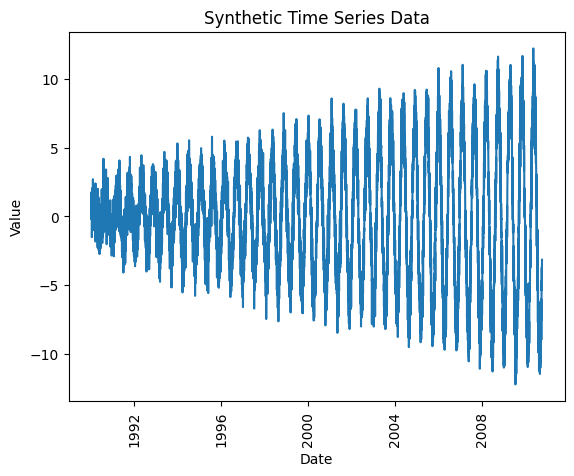

In [5]:
import matplotlib.pyplot as plt

plt.plot(df['date'], df['value'])
plt.title("Synthetic Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.show()


In [6]:
# Save to CSV
df.to_csv("data/synthetic_data.csv", index=False)